# Lab 2: Performance Tuning
## Feb 2 2023


### Timing python code

In [2]:
import timeit
import numpy as np
from math import log10 as lg10
import matplotlib.pyplot as plt

def f(x):
    return x * x

%timeit -n 10 -r 2 f(3)

155 ns ± 21.5 ns per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [3]:
mycode = ''' 
def f(x): 
    return x*x 
f(x_val)
'''

x_val = 3
total_time = timeit.timeit(mycode, number = 10, globals=globals())
print(f'{total_time/10} sec per loop')

3.291999746579677e-07 sec per loop


### Data Structure Choice: Membership Testing

### List

- Searching for an element in list takes O(N)

In [5]:
letters = 'ASDFGHJKLQWERTYUIOPZXCVBNM'

letters_list = [x + y + z for x in letters for y in letters for z in letters]

print(letters_list[:10])

['AAA', 'AAS', 'AAD', 'AAF', 'AAG', 'AAH', 'AAJ', 'AAK', 'AAL', 'AAQ']


In [1]:
[(x,z) for x in range(100,105,1)for z in range(10)]
# for x in range():
#      for z in range():
            # x,z

[(100, 0),
 (100, 1),
 (100, 2),
 (100, 3),
 (100, 4),
 (100, 5),
 (100, 6),
 (100, 7),
 (100, 8),
 (100, 9),
 (101, 0),
 (101, 1),
 (101, 2),
 (101, 3),
 (101, 4),
 (101, 5),
 (101, 6),
 (101, 7),
 (101, 8),
 (101, 9),
 (102, 0),
 (102, 1),
 (102, 2),
 (102, 3),
 (102, 4),
 (102, 5),
 (102, 6),
 (102, 7),
 (102, 8),
 (102, 9),
 (103, 0),
 (103, 1),
 (103, 2),
 (103, 3),
 (103, 4),
 (103, 5),
 (103, 6),
 (103, 7),
 (103, 8),
 (103, 9),
 (104, 0),
 (104, 1),
 (104, 2),
 (104, 3),
 (104, 4),
 (104, 5),
 (104, 6),
 (104, 7),
 (104, 8),
 (104, 9)]

In [6]:
# note that ABC is not the first element but AAA
# use in command line, therefore start with %
%timeit -n 100 'ABC' in letters_list 

%timeit -n 100 'PQR' in letters_list

20.1 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
224 µs ± 51.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
# to use timeit in python
# cons: need to be string or lambda
import matplotlib.pyplot as plt
mycode = '''
def check_membership(elem):
    return elem in numbers_list
check_membership(i)
'''
times = []
for i in range(0,100000,10):
    numbers_list = np.random.randint(0, i, i)
    total_time = timeit.timeit(mycode, number = 5, globals=globals())
    
    times.append(total_time / 5)
    

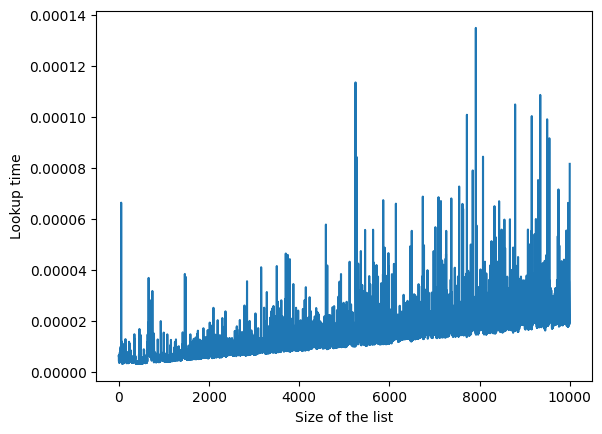

In [15]:
plt.plot(times)
plt.xlabel('Size of the list')
plt.ylabel('Lookup time')
plt.show()

### Dictionary
- Dictionaries are implemented as a Hash table, which hash the key
- _Dicts_ and _sets_ are fast when looking up elements. 
- Insert, search and delete operations are O(1)



In [16]:
letters_dict = {x: x for x in letters_list}
# Time how long it takes to find ‘abc’ and 'pqr'in letters_dict.

print('in dict')
%timeit -n 100 'ABC' in letters_dict
%timeit -n 100 'PQR' in letters_dict

in dict
33.2 ns ± 3.35 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
39.7 ns ± 5.92 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
mycode = '''
def check_membership(elem):
    return elem in numbers_dict
check_membership(i)
'''
times = []
for i in range(0,10000,10):
    numbers_list = np.random.randint(0,i,i)
    numbers_dict = {k:k for k in numbers_list}
    total_time = timeit.timeit(mycode, number = 10, globals=globals())
    
    times.append(total_time/10)
    

Text(0, 0.5, 'Lookup time')

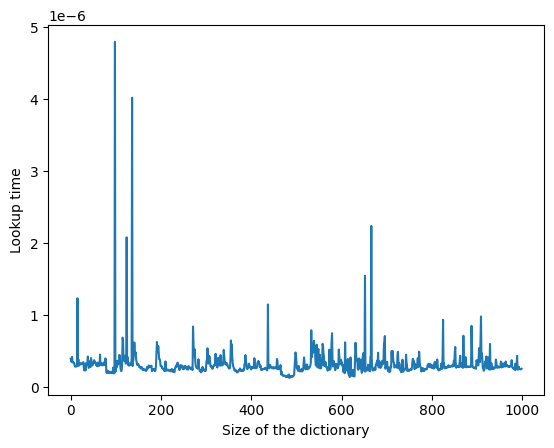

In [22]:
plt.plot(times)
plt.xlabel('Size of the dictionary')
plt.ylabel('Lookup time')

### Function Choice: String Concatenation

- Python strings are immutable.
- str1 + str2 creates a new string. *****
- This copying can lead to significant slowdown

In [23]:
def method1():
    out_str = ''
    global loop_count
    for num in range(loop_count):
        out_str += 'num'
    return out_str

def method2():
    str_list = []
    global loop_count
    for num in range(loop_count):
        str_list.append('num')
    return ''.join(str_list)

def method3():
    global loop_count
    return ''.join(['num' for i in range(loop_count)])

In [24]:
loop_count = 100000

%timeit -n 10 method1()
%timeit -n 10 method2()
%timeit -n 10 method3()  # list comprehension -> faster

11.3 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.86 ms ± 718 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.88 ms ± 883 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Optimizing loops

- Avoid for loops, use map or numpy operations
- Numpy is faster due to vectorized implementations

Multiply two 1000x1000 matrices

In [25]:
N = 100
arr1 = np.random.random((N,N))
arr2 = np.random.random((N,N))

### How fast is  For loop ?

In [26]:
%%timeit -n 1

def multiply(x,y):

    m1,n1 = x.shape
    m2,n2 = y.shape
    
    assert(n1 == m2)
    z = np.zeros((m1,n2))

    for i in range(m1): 
        for j in range(n2): 
            for k in range(m2): 
                z[i][j] += x[i][k] * y[k][j]
                
    return z

multiply(arr1, arr2)

498 ms ± 11.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### How fast is numpy?

In [27]:
%%timeit -n 1

def mod_multiply(x,y):
    """
    Multiply two arrays using numpy.
    """
    return np.matmul(x,y)

mod_multiply(arr1, arr2)

The slowest run took 128.59 times longer than the fastest. This could mean that an intermediate result is being cached.
462 µs ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Decorators

In Python, functions are the first class objects, which means that:

- Functions are objects; they can be referenced to, passed to a variable and returned from other functions as well.

- Functions are taken as the argument into another function and then called inside the wrapper function.


In [28]:
# defining a decorator, pass in "func", return "wrapper"

def my_decorator(func):
    
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

def say_whee():
    print("Whee!")

say_whee = my_decorator(say_whee)
say_whee()

Something is happening before the function is called.
Whee!
Something is happening after the function is called.


In [29]:
@my_decorator
def say_whee():
    print("Whee!")
say_whee()

Something is happening before the function is called.
Whee!
Something is happening after the function is called.


In [30]:
## Showing args and kwargs for decorators
def decorator_with_args(func):
    
    def wrapper(*args, **kwargs):
        print("Something is happening before the function is called.")
        func(*args, **kwargs)
        print("Something is happening after the function is called.")
    return wrapper

# * == ... in R, * for positional arg, ** for keyword arg
# ** will be save as dict, * will be save as tuple
@decorator_with_args
def say_whee_withargs(*args, **kwargs):  
    print("Whee!")
    if 'course' in kwargs:
        print('Course: ', kwargs['course'])
say_whee_withargs(course='Python')

Something is happening before the function is called.
Whee!
Course:  Python
Something is happening after the function is called.


### Caching with decorators

- Decorators can be used to cache intermediate values
- Can be used to avoid repeated calculations (**dynamic programming**)

In [31]:
def fib(i):
    if i < 2: return 1
    return fib(i-1) + fib(i-2)

def cache_fib(f): 
    memory = {} 
  
    # This inner function has access to memory 
    # and 'f' 
    def inner(num): 
        if num not in memory:          
            memory[num] = f(num) 
        return memory[num] 
  
    return inner 

@cache_fib
def better_fib(i):
    if i < 2: return 1
    return better_fib(i-1) + better_fib(i-2)


In [32]:
%timeit -n 1 fib(30)


221 ms ± 19.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%timeit -n 1 better_fib(30)

The slowest run took 585.76 times longer than the fastest. This could mean that an intermediate result is being cached.
9.17 µs ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
from functools import lru_cache

@lru_cache(maxsize=128)
def better_fib(i):
    if i < 2: return 1
    return better_fib(i-1) + better_fib(i-2)

%timeit -n 1 better_fib(30)

The slowest run took 103.97 times longer than the fastest. This could mean that an intermediate result is being cached.
2.32 µs ± 5.12 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
